<a href="https://colab.research.google.com/github/azman-s/TSF-GRIP-MAR-2021/blob/main/TSF_1_(Prediction_using_Supervised_ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1)Prediction using Supervised ML**

### > **AZMAN.S / TSF GRIP MAY-2021**




---
###Predicting score based on hours studied using simple linear regression

---
*Let us first import the dataset*



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
from sklearn import metrics

%matplotlib inline

data_url = 'http://bit.ly/w-data'
df = pd.read_csv(data_url)
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


*Check for any empty/invalid data*

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


*Check correlation and plotting the data in a 2D graph*

In [3]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0, 0.5, 'Scores in Percentage')

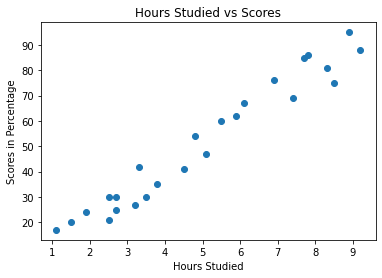

In [4]:
X = df.loc[:,'Hours'].values.reshape(-1,1)
Y = df.loc[:,'Scores'].values.reshape(-1,1)

mpl.scatter(X,Y)
mpl.title('Hours Studied vs Scores')  
mpl.xlabel('Hours Studied')  
mpl.ylabel('Scores in Percentage')  

*Creating a training dataset and training the model to predict test data set and plotting the regression line*

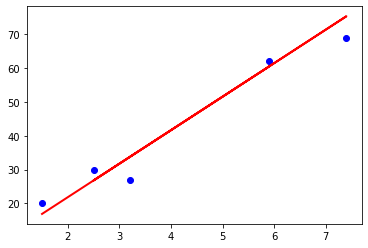

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

training_regressor = LinearRegression()
training_regressor.fit(X_train, y_train)

#slope line : y = mx + c
slope = training_regressor.intercept_ * X_test + training_regressor.coef_ 

y_pred = training_regressor.predict(X_test)

mpl.scatter(X_test, y_test,  color='blue')
mpl.plot(X_test, y_pred, color='red', linewidth=2)

*Difference between actual and predicted values using training dataset*

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


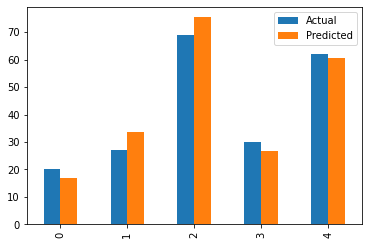

In [6]:
test_sample = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
test_sample.plot(kind='bar')

test_sample

*Using trained model to predict the score based on the study duration. Please provide a input to get the predicted output.*

In [7]:
test_value = input("Enter the No. of hours : ")
test_data = pd.DataFrame([test_value])
predicted_value = training_regressor.predict(test_data)

print("If you study {} hours, you will score {}%.".format(test_value,str(predicted_value[0].round(2))[1:-1]))

Enter the No. of hours : 9.25
If you study 9.25 hours, you will score 93.69%.


*Evaluation Metrics*

In [8]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


##***Thank you for your time. :)***